#### Recreate Figure 4 in Gandhi, P. J., et al. (2022)

@author: Pratik Gandhi <pjgandhi@ucdavis.edu>

In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii

In [2]:
# specific matplotlib settings from my matplotlibrc file
plt.rcParams['legend.frameon'] = False
plt.rcParams['savefig.format'] = 'pdf'
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['figure.figsize'] = (8, 7.5)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.style'] = 'normal'
plt.rcParams['font.variant'] = 'normal'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.stretch'] = 'normal'
plt.rcParams['font.size'] = 25.0
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 2.5
plt.rcParams['axes.labelsize'] = 25.0
plt.rcParams['axes.labelpad'] = 6.0
plt.rcParams['axes.titlepad'] = 0.0
plt.rcParams['axes.titlesize'] = 25.0
plt.rcParams['axes.formatter.limits'] = -7,7
plt.rcParams['xtick.major.size'] = 15.0
plt.rcParams['ytick.major.size'] = 15.0
plt.rcParams['xtick.minor.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 8.0
plt.rcParams['xtick.major.pad'] = 12.0
plt.rcParams['ytick.major.pad'] = 12.0
plt.rcParams['xtick.minor.pad'] = 12.0
plt.rcParams['ytick.minor.pad'] = 12.0
plt.rcParams['xtick.major.width'] = 1.6
plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['xtick.minor.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.8
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['legend.scatterpoints'] = 1
plt.rcParams['figure.constrained_layout.use'] = False

#### Handling i/o; reading in data points along with some manipulations

In [3]:
# reading in asas-sn data with errors; modified to Baldry+12 SMF
asassn = ascii.read('../data/asassn_vollim_mod.txt')
asassn_mass = np.array(asassn['massBin'])
asassn_mass = np.power(10, asassn_mass)
asassn_rate = np.array(asassn['relRate'])
low_err = np.array(asassn['relRateErrLow'])
up_err = np.array(asassn['relRateErrUp'])

In [4]:
# reading in asas-sn upper limits; modified to Baldry+12 SMF
asassn_uplim = ascii.read('../data/asassn_vollim_mod_uplims.txt')
asassn_uplim_mass = np.array(asassn_uplim['massBin'])
asassn_uplim_mass = np.power(10, asassn_uplim_mass)
asassn_uplim_uperr = np.array(asassn_uplim['relRateErrUp'])
asassn_uplim_uplims = np.array(['1, 1, 1'], dtype='bool')
asassn_uplim_yerr = 17.5

In [5]:
# reading in OG and adjusted FIRE-2 simulation rates
data_OG_FIRE = ascii.read('../data/maoz-solar_alpha0.0-nocap_norm10.txt')
data_adj_B19 = ascii.read('../data/maoz-adjustedSFH-B19_alpha0.0-nocap_norm10.txt')

In [6]:
# reading in DES data shared with us, normalised to 10^10Msun
DES = ascii.read('../data/SNrates_DES_Wiseman21_norm10.txt')
DES_mass = DES['stellarMass']
DES_specRate = DES['specRate']
DES_uperr = DES['specRateErrUp']
DES_lowerr = DES['specRateErrLow']
DES_sigmaUp = np.array(DES_uperr) - np.array(DES_specRate)
DES_sigmaLow = np.array(DES_specRate) - np.array(DES_lowerr)

In [7]:
# reading in data points for full contours for spread in Ia rate values
rate_contours = ascii.read('../data/SNrates_contours_complete.txt')
rate_contour_mass = rate_contours['stellarMass']
rate_contour_low = rate_contours['low']
rate_contour_high = rate_contours['high']

#### Plot: relative specific SN Ia rates

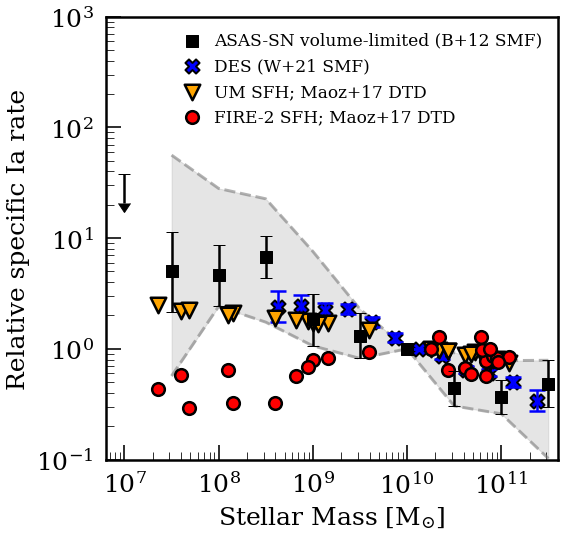

<Figure size 576x540 with 0 Axes>

In [8]:
# initialising figure
fig, ax = plt.subplots(1,1)
fig.set_tight_layout(False)
fig.subplots_adjust(left=0.175, right=0.96, top=0.97, bottom=0.15, wspace=0)

# plotting asassn data points with error bars (normalised)
ax.scatter(asassn_mass, asassn_rate, marker='s', s=150, c='black', \
           label='ASAS-SN volume-limited (B+12 SMF)', zorder=100000000)
ax.errorbar(asassn_mass, asassn_rate, yerr=(asassn_rate-low_err,up_err-asassn_rate), 
            fmt='none', ecolor='black', capsize=6.0, zorder=100000000, label=None)

# plotting asassn upper limits
ax.errorbar(asassn_uplim_mass, asassn_uplim_uperr, yerr=asassn_uplim_yerr, 
            uplims=asassn_uplim_uplims, fmt='none', \
            ecolor='black', zorder=100000000, capsize=6.0, label=None)

# plotting DES sample normalised to 10^10Msun
ax.scatter(DES_mass, DES_specRate, marker='X', s=200, c='blue', linewidths=2, 
           edgecolors='k', alpha=1, zorder=100, label='DES (W+21 SMF)')
ax.errorbar(DES_mass, DES_specRate, yerr=(DES_sigmaLow, DES_sigmaUp), fmt='none', 
            ecolor='blue', capsize=8.0, alpha=1, capthick=2.5, zorder=100, 
            barsabove=False, label=None)

# plotting sim data points with SFH adjusted to B+19
ax.scatter(data_adj_B19['stellarMass'], data_adj_B19['specRate'], marker='v', \
            s=240, c='orange', alpha=1, edgecolors = 'k', linewidths=2.5, \
            label='UM SFH; Maoz+17 DTD', zorder=1000000)

# plotting OG sim data points
ax.scatter(data_OG_FIRE['stellarMass'], data_OG_FIRE['specRate'], marker='o', \
            s=160, c='red', alpha=1, edgecolors = 'k', linewidths=2.5, \
            zorder=10000000, label='FIRE-2 SFH; Maoz+17 DTD')

# contours around largest spread in Ia rate values
ax.plot(rate_contour_mass, rate_contour_low, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.plot(rate_contour_mass, rate_contour_high, color='gray', alpha=0.6, lw=3, 
        linestyle='dashed', label=None)
ax.fill_between(rate_contour_mass, rate_contour_low, rate_contour_high, 
                color='gray', alpha=0.2, label=None, zorder=0.1)

# specifying rest of the plot
ax.set_xlabel("Stellar Mass [$\\rm{M}_{\odot}$]")
ax.set_ylabel("Relative specific Ia rate")
ax.set_xlim(10**6.8, 10**11.6)
ax.set_ylim(10**-1, 10**3)
ax.legend(prop={'size':17}, loc='upper right', ncol=1)
ax.set_xscale('log')
ax.set_yscale('log')
#plt.savefig('/specify/your/desired/path/here.pdf')
plt.show()
plt.clf()